# Input and methods

In [ ]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss


!wget https://www.fit.vutbr.cz/study/courses/ISS/public/proj2023-24/xberny00.wav

x, fs = sf.read("xberny00.wav")
time = 5 # seconds
rows = 6
cols = 2
plt_id = 1


def min_max_normalize(spectrum):
    min_val = np.min(spectrum)
    max_val = np.max(spectrum)
    normalized_spectrum = (spectrum - min_val) / (max_val - min_val)
    return normalized_spectrum

# generated with chatGPT
def find_max_amplitude(signal, start_index, end_index):
    interval_signal = signal[start_index:end_index]
    max_amplitude_index = np.argmax(np.abs(interval_signal))
    max_amplitude_x = start_index + max_amplitude_index
    return max_amplitude_x

def find_first_index(signal, start_index, end_index):
    interval_signal = signal[start_index:end_index]
    first_index = np.where(interval_signal != 0)[0][0]
    first_x = start_index + first_index
    return first_x

def find_last_index(signal, start_index, end_index):
    interval_signal = signal[start_index:end_index]
    last_index = np.where(interval_signal != 0)[0][-1]
    last_x = start_index + last_index
    return last_x

def subplot():
    global plt_id
    plt.subplot(rows, cols, plt_id)
    plt_id += 1

def figure(row, col):
    global rows, cols, plt_id
    rows = row
    cols = col
    plt_id = 1
    plt.figure()
    plt.tight_layout()




# Tasks



## Plot the signal

 a) Load ECG signal login.wav, choose 5 seconds and plot it in time-domain.\
 b) Compute and plot spectrum of the chosen 5 seconds of the signal.

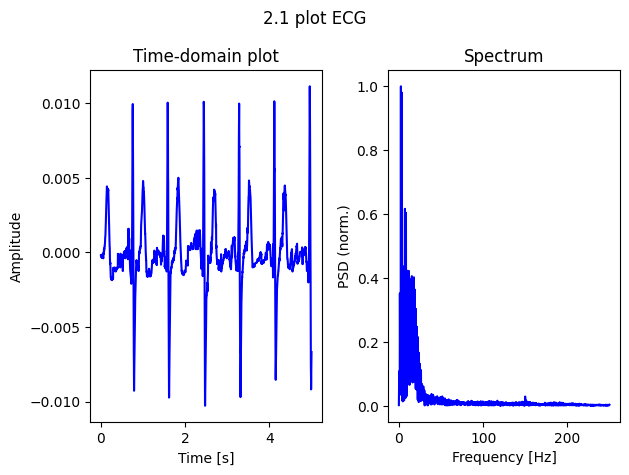

In [ ]:
figure(1, 2)
plt.suptitle("2.1 plot ECG")
# 2.1 a) plot 5 seconds of signal and plot it in time domain
subplot()
time_values = np.arange(0, 5000) / fs
plt.title("Time-domain plot")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.plot(time_values[:time*fs], x[:time*fs], color="blue")

# 2.1 b) compute a spectrum from 5 seconds of the signal
subplot()
dft = np.fft.fft(x[:time*fs])
module = np.abs(dft)
moduleHalf = module[:module.size // 2]
plt.title("Spectrum")
plt.ylabel("PSD (norm.)")
plt.xlabel("Frequency [Hz]")
frequencies = np.fft.fftfreq(len(dft), d=1/fs)[:len(moduleHalf)]
plt.plot(frequencies, min_max_normalize(moduleHalf), color="blue")
plt.tight_layout()

 c) [0.5b]
You can see interference in the spectrum at 50Hz or 60Hz and their harmonic frequencies. Explain what causes it.

Interference is caused by noise from the power supply, 50 Hz (or 60 Hz) is the frequency of alternating current. We can see interference at 150 Hz in the spectrum.

## Resample the signal



a) Resample signal to 100 Hz sample-rate

In [ ]:
# 2.2 a) resample to 100 Hz sample-rate
fs2 = 100 #Hz
x2 = ss.decimate(x, 5)


b) [1b] Plot 5 s of original and resampled signal int time domain and plot their spectrums

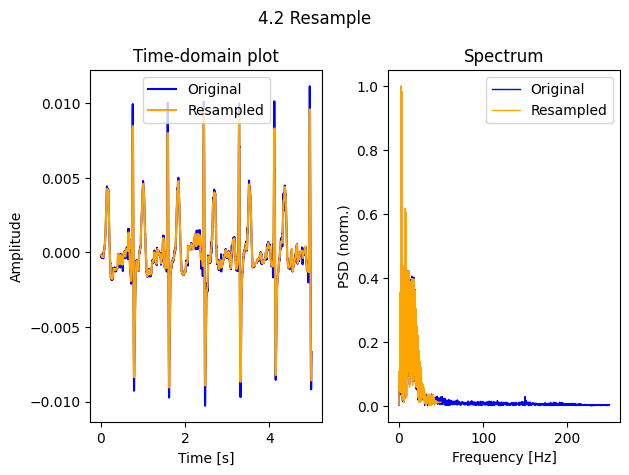

In [ ]:
figure(1, 2)
plt.suptitle("4.2 Resample")
# 2.2 b) plot 5s of original and resampled signals
subplot()
time_values2 = np.arange(0, 500) / fs2
plt.title("Time-domain plot")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.plot(time_values[:time*fs], x[:time*fs], color="blue", label="Original")
plt.plot(time_values2, x2[:time*fs2], color="orange", label="Resampled")
plt.legend()

subplot()
dft2 = np.fft.fft(x2[:time*fs2])
module2 = np.abs(dft2)
moduleHalf2 = module2[:module2.size // 2]
plt.title("Spectrum")
plt.xlabel("Frequency [Hz]")
plt.ylabel("PSD (norm.)")
frequencies2 = np.fft.fftfreq(len(dft2), d=1/fs2)[:len(moduleHalf2)]

plt.plot(frequencies, min_max_normalize(moduleHalf), color="blue", label="Original", linewidth=1)
plt.plot(frequencies2, min_max_normalize(moduleHalf2), color="orange", label="Resampled", linewidth=1)
plt.legend()
plt.tight_layout()

## Filter original signal with 10Hz-20Hz band-pass filter




a) Create band-pass filter and plot filter characteristics with zeros and poles.

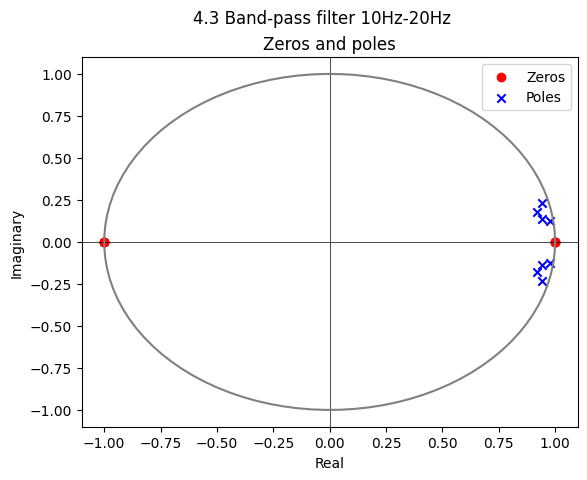

In [ ]:
figure(1,1)
plt.suptitle("4.3 Band-pass filter 10Hz-20Hz")
# 2.3 band-pass filter 10-20 Hz
# a)
nyquist = fs / 2
low = 10 / nyquist
high = 20 / nyquist
b, a = ss.butter(4, [low, high], btype="band")

#poles and zeros
zeros, poles, gain = ss.tf2zpk(b, a)
subplot()
plt.scatter(np.real(zeros), np.imag(zeros), marker="o", color="red", label="Zeros")
plt.scatter(np.real(poles), np.imag(poles), marker="x", color="blue", label="Poles")
plt.title("Zeros and poles")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color="black",linewidth=0.5)
plt.axvline(0, color="black",linewidth=0.5)
plt.legend()

# unit circle
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), color="gray")

# filter characteristic
frequencies, magnitude = ss.freqz(b, a, worN=8000, fs=fs, whole=False)
phase = np.angle(magnitude)

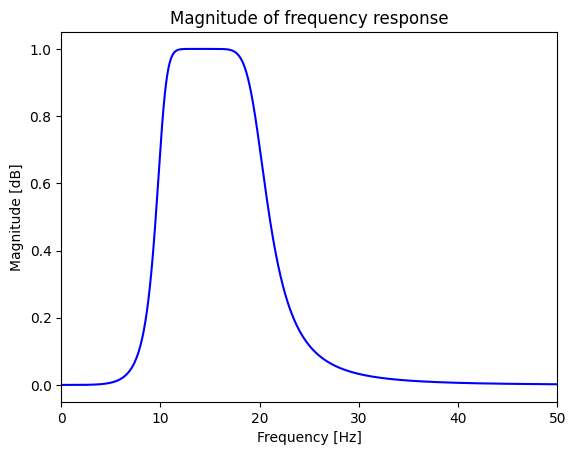

In [ ]:
figure(1,1)
# plot the magnitude
subplot()
plt.xlim([0, 50]) # show only first frequencies bellow 50 Hz
plt.title("Magnitude of frequency response")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.plot(frequencies, np.abs(magnitude), color="blue") # normalized magnitude
# plt.plot(frequencies, c.mag2db(magnitude)) # magnitude in dB

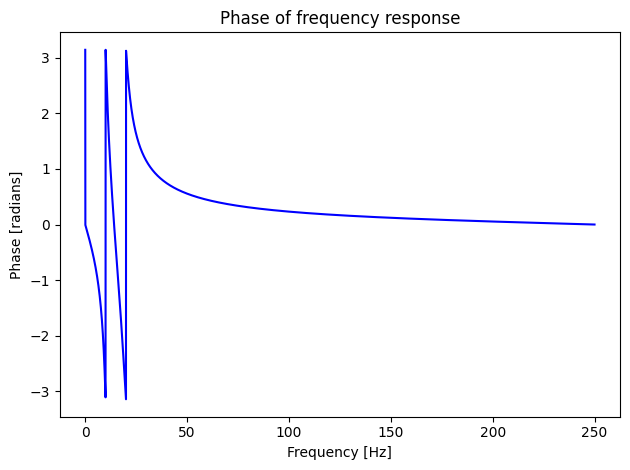

In [ ]:
figure(1,1)
# plot the phase
subplot()
plt.title("Phase of frequency response")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.plot(frequencies, phase, color="blue")
plt.tight_layout()

  b) Use the filter on the loaded signal. Plot original and filtered signal in time-domain and plot their spectrums.


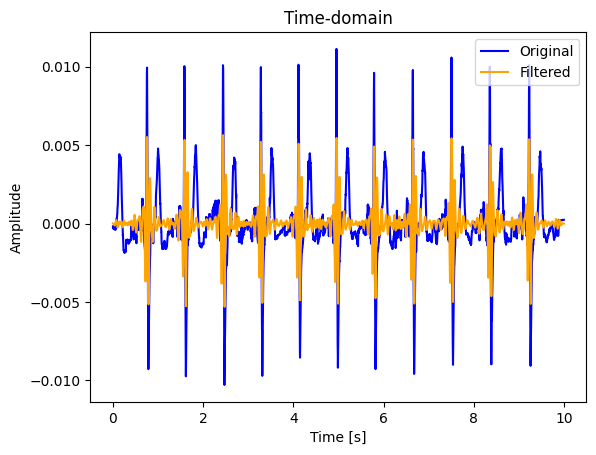

In [ ]:
figure(1,1)
# 2.3 b)
# use filter on original signal
filtered = ss.filtfilt(b, a, x)
# time-domain plot
subplot()
plt.title("Time-domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.plot(time_values, x, color="blue", label="Original")
plt.plot(time_values, filtered, color="orange", label="Filtered")
plt.legend()

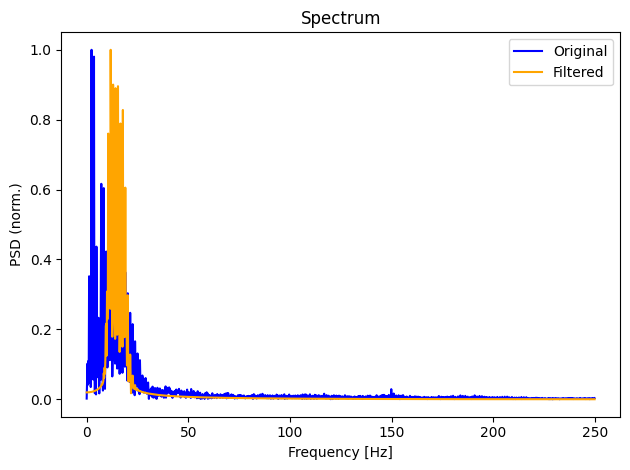

In [ ]:
figure(1,1)
# spectrum
subplot()
# plot original
dft = np.fft.fft(x[:time*fs])
module = np.abs(dft)
moduleHalf = module[:module.size // 2]
frequencies = np.fft.fftfreq(len(dft), d=1/fs)[:len(moduleHalf)]

plt.plot(frequencies, min_max_normalize(moduleHalf), color="blue", label="Original")
dft = np.fft.fft(filtered[:time*fs])
module = np.abs(dft)
moduleHalf = module[:module.size // 2]
plt.title("Spectrum")
plt.ylabel("PSD (norm.)")
plt.xlabel("Frequency [Hz]")
plt.plot(frequencies, min_max_normalize(moduleHalf), color="orange", label="Filtered")
plt.legend()
plt.tight_layout()


c) What is the difference betwwen filtered and unfiltered signal? What is the difference between their spectrums? What maximum shift could occur, if we used only one side filtration?


Filtered signal lacks T-waves, so it has half the unfiltered's amplitude and lost almost all frequencies under 10 Hz. It also lacks frequencies over 20 Hz, but the difference is not as significant, since there were not a lot of frequencies begin with.
If we used only basic convolution, the maximu shift could be 2 samples, because we use 4th order bandpass filter (4 (order) / 2 (bandpass)).

## QRS detection

 Create QRS detector in time domain. Detected QRS complexes save and plot the signal in time-domain with highlighted QRS detections.

   a) Detect QRS in resampled filtered signal usingDeteku a threshold.

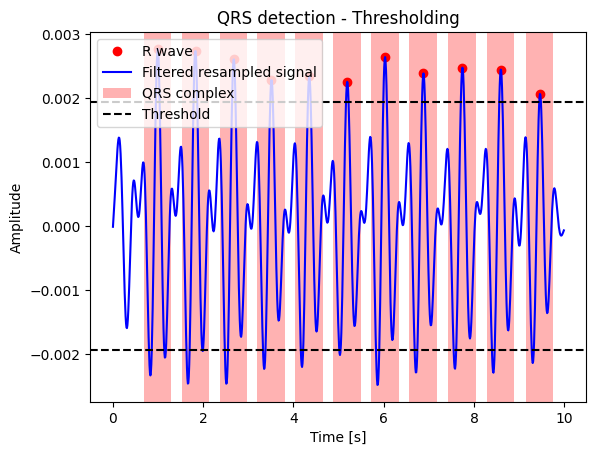

In [ ]:
figure(1,1)
resampled_filtered = ss.filtfilt(b, a, x2)

# a) threshhold
max_amplitude = np.amax(np.abs(resampled_filtered))
threshold = max_amplitude * 0.7
thresholded = np.where(abs(resampled_filtered) < threshold, 0, resampled_filtered)

subplot()
plt.title("QRS detection - Thresholding")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

over = np.where(resampled_filtered > threshold)[0]

qrs_list = []
current_sublist = [over[0]]

for number in over[1:]:
    if number == current_sublist[-1] + 1:
        current_sublist.append(number)
    else:
        qrs_list.append(current_sublist)
        current_sublist = [number]
qrs_list.append(current_sublist)

r_list = []
for l in qrs_list:
    last = len(l) - 1
    r_list.append(find_max_amplitude(resampled_filtered, l[0], l[last]))
# Add the last sublist
qrs_list.append(current_sublist)

average_period = np.mean(np.diff(r_list))
time_values2 = np.arange(0, 1000) / fs2

plt.plot(time_values2[r_list], resampled_filtered[r_list], "ro", label="R wave")
plt.plot(time_values2, resampled_filtered, color="blue", label="Filtered resampled signal")


# Plot thresholded regions as rectangles from q peak to s peak
neighborhood = 10
firstQ = -1
firstS = -1
for r in r_list:
    q = find_first_index(resampled_filtered, round(r - average_period/4) - neighborhood, round(r - average_period/4) + neighborhood)
    s = find_last_index(resampled_filtered, round(r + average_period/4) - neighborhood, round(r + average_period/4) + neighborhood)
    # alternativly to find exact peaks
    # q = find_max_amplitude(resampled_filtered, round(r - average_period/4) - neighborhood, round(r - average_period/4) + neighborhood)
    # s = find_max_amplitude(resampled_filtered, round(r + average_period/4) - neighborhood, round(r + average_period/4) + neighborhood)

    if firstQ == -1:
        firstQ = q
    if firstS == -1:
        firstS = s
    if r == r_list[0]:
        plt.axvspan(time_values2[q], time_values2[s], facecolor="red", alpha=0.3, label="QRS complex")
    else:
        plt.axvspan(time_values2[q], time_values2[s], facecolor="red", alpha=0.3)


# Lines showing value of threshold
plt.axhline(y=threshold, color="black", linestyle="--", label="Threshold")
plt.axhline(y=threshold*(-1), color="black", linestyle="--")
plt.legend()


b) Detect QRS in signal using autocorrelation in resampled unfiltered signal.

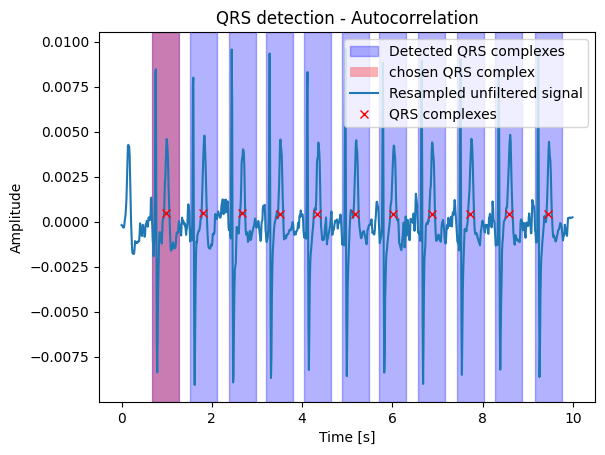

In [ ]:
# b) autocorelation
figure(1,1)
qrs = x2[firstQ:firstS]
correlation_result = ss.correlate(x2, qrs, mode="same")

peaks, _ = ss.find_peaks(correlation_result, height=0.6 * np.max(correlation_result))

subplot()
for peak in peaks:
    start = peak - len(qrs) // 2
    end = peak + len(qrs) // 2
    if start < 0:
        start = 0
    if peak == peaks[0]:
        plt.axvspan(time_values2[start], time_values2[end], color="blue", alpha=0.3, label="Detected QRS complexes")
    else:
        plt.axvspan(time_values2[start], time_values2[end], color="blue", alpha=0.3)


plt.axvspan(time_values2[firstQ], time_values2[firstS], facecolor="red", alpha=0.3, label="chosen QRS complex")
plt.plot(time_values2, x2, label="Resampled unfiltered signal")
plt.plot(peaks / fs2, correlation_result[peaks], "rx", label="QRS complexes")
plt.title("QRS detection - Autocorrelation")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()


## Spectrogram

 a) Detect QRS using spectogram. Compute and plot spectrogram of resampled and filtered signal. Use parameters `hop_size=120ms`and `window_len=200ms`. Normalize spectrogram in time. Compute sums of spectral energy for each time bin. Create threshold based on spectral energy of first QRS complex. Use this threshold to detect the rest of QRS complexes in the signal.

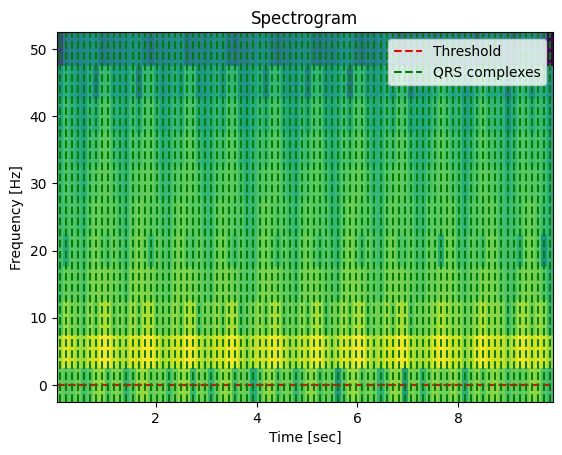

In [ ]:
# 2.5 spectrogram a)
# Parameters
hop_size = 0.12  # in seconds
window_len = 0.2  # in seconds

# Convert parameters to samples
hop_size_samples = int(hop_size * fs2)
window_len_samples = int(window_len * fs2)

# Compute spectrogram
frequencies, times, Sxx = ss.spectrogram(resampled_filtered, fs2, nperseg=window_len_samples, noverlap=window_len_samples - hop_size_samples)

# Normalize spectrogram
Sxx = Sxx / np.max(Sxx)

# Compute energy
energy = np.sum(Sxx, axis=0)

# Threshold based on the energy of the first QRS complex
qrs_complex = resampled_filtered[firstQ:firstS]
qrs_energy = np.sum(qrs_complex ** 2)

threshold = qrs_energy * 0.5

# Detect QRS complexes
qrs_complexes = times[energy > threshold]

figure(1, 1)
subplot()
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.title("Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")

# Plot threshold
plt.axhline(y=threshold, color="r", linestyle="--", label="Threshold")
# Plot QRS complexes
for qrs in qrs_complexes:
    plt.axvline(x=qrs, color="g", linestyle="--")

plt.legend(["Threshold", "QRS complexes"])

b) Detect QRS using envelopes and Hilbert transformation.

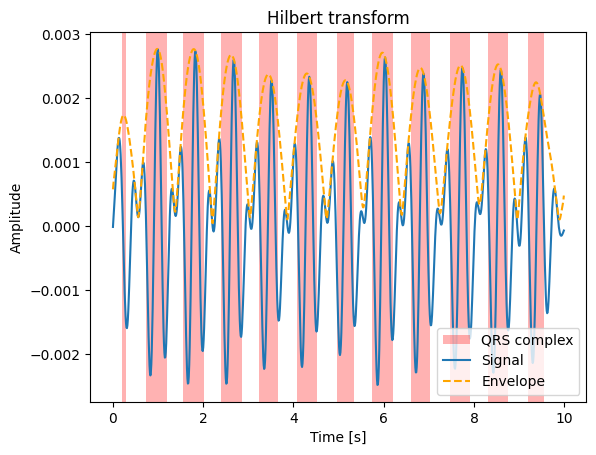

In [ ]:
# 2.5 b)
# Hilbert transform
# Compute FFT
F = np.fft.fft(resampled_filtered)

# Zero out the right half of the spectrum
F[int(len(F)/2):] = 0

# Double the left half of the spectrum, except for the first and middle bins
F[1:int(len(F)/2)] *= 2

# Compute inverse FFT
inverse_F = np.fft.ifft(F)
envelope = np.abs(inverse_F)

# find qrs complexes
envelope_threshold = np.max(envelope) * 0.6
qrs_complexes_envelope = np.where(envelope > envelope_threshold)[0]


# Plot signal and envelope
figure(1,1)
subplot()
diff = np.diff(qrs_complexes_envelope)
non_consecutive_i = np.where(diff != 1)[0]
areas = []
start = qrs_complexes_envelope[0]
for i in non_consecutive_i:
    end = qrs_complexes_envelope[i]
    areas.append((start, end))
    start = qrs_complexes_envelope[i+1]

areas.append((start, qrs_complexes_envelope[-1]))

for a in areas:
    if a != areas[0]:
        plt.axvspan(time_values2[a[0]], time_values2[a[1]], facecolor="red", alpha=0.3)
    else:
        plt.axvspan(time_values2[a[0]], time_values2[a[1]], facecolor="red", alpha=0.3, label="QRS complex")

plt.title("Hilbert transform")
plt.plot(time_values2, resampled_filtered, label="Signal")
plt.plot(time_values2, envelope, label="Envelope", linestyle="--", color="orange")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()

c) [0.5b] In which methods of QRS detection do we mind a rotated (flipped) signal, which ones do not and why?

We do not mind flipped signal when using:
- spectogram, because it is magnitude-based
- autocorrelation, because it correlates with itself and the orientation won't change anything
- thresholding, when implemented correctly - QRS complexes are still detected in the flipped signal, but in the opposite direction

We mind flipped signal in Hilbert Transform, because the phase used to compute the envelope changes when the signal is flipped